In [3]:
using Plots
using Random
using LinearAlgebra

# Parameters of the Model
v0 = 80 # Speed of particles
eta = 0.0 # Noise parameter, range: 0 to 1
L = 100.0   # Length of Box
N = 100   # Number of particles
R = 12  # Interaction radius
dt = 1.0   # Time step
Nf = 1000 # Number of time steps
Random.seed!(10)   # Seed of random number generator

# Particle positions and velocities initialization
xp = rand(N) * L
yp = rand(N) * L
theta = 2 * π * rand(N)
vx = v0 * cos.(theta)
vy = v0 * sin.(theta)

# Function to calculate the adjacency matrix
function adjacency_matrix(xp, yp, R)
    N = length(xp)
    adj_matrix = zeros(Int, N, N)
    for i in 1:N
        for j in 1:N
            if i != j && norm([xp[i] - xp[j], yp[i] - yp[j]]) <= R
                adj_matrix[i, j] = 1
            elseif i == j
                adj_matrix[i,j]=1
            end
        end
    end
    return adj_matrix
end

# Function to apply customized periodic boundary conditions
function apply_periodic_boundary!(x, L)
    for i in 1:length(x)
        if x[i] >= 0
            x[i] = x[i] % L
        else
            while x[i] < 0
                x[i] += L
            end
        end
    end
end


# Initialize an array to store the largest eigenvalues
largest_eigenvalues = Float64[]

# Animation function
function animate(i)
    global xp, yp, theta, vx, vy

    # Move particles and apply periodic BCs
    xp .+= vx * dt
    yp .+= vy * dt
    apply_periodic_boundary!(xp, L)
    apply_periodic_boundary!(yp, L)
    
    # Calculate the mean angle of neighbors within R
    mean_theta = similar(theta)
    for i in 1:N
        neighbors = ((xp .- xp[i]).^2 .+ (yp .- yp[i]).^2 .< R^2)
        sx = sum(cos.(theta[neighbors]))
        sy = sum(sin.(theta[neighbors]))
        mean_theta[i] = atan(sy, sx)
    end
    
    # Add random noise and update velocities
    theta .= mean_theta .+ eta * (rand(N) .- 0.5) * 2 * π
    vx = v0 * cos.(theta)
    vy = v0 * sin.(theta)
    adj_matrix = adjacency_matrix(xp, yp, R)
   # Compute eigenvalues
    eigenvalues = eigvals(Symmetric(adj_matrix))

    # Check if eigenvalues are real
    if all(isreal, eigenvalues)
        # Store the largest eigenvalue
        push!(largest_eigenvalues, maximum(eigenvalues))
        println("Iteration $i, largest eigenvalue: $(maximum(eigenvalues))")
    else
        println("Non-real eigenvalues encountered at iteration $i")
    end
end
      


 











frames=[]
# Create each frame manually
for i in 1:Nf
    animate(i)
    push!(frames, plot(xp, yp, seriestype = :scatter, xlims=(0, L), ylims=(0, L), legend=false))
end
    
    
     

Iteration 1, largest eigenvalue: 7.119878989100092
Iteration 2, largest eigenvalue: 9.72789179316927
Iteration 3, largest eigenvalue: 10.188170351859723
Iteration 4, largest eigenvalue: 9.836558193400247
Iteration 5, largest eigenvalue: 11.780430731252228
Iteration 6, largest eigenvalue: 13.435076406441745
Iteration 7, largest eigenvalue: 9.641984133301282
Iteration 8, largest eigenvalue: 12.197785421793363
Iteration 9, largest eigenvalue: 14.431497594477523
Iteration 10, largest eigenvalue: 17.147298842472303
Iteration 11, largest eigenvalue: 15.396940255262104
Iteration 12, largest eigenvalue: 17.354551208819593
Iteration 13, largest eigenvalue: 18.35656824175407
Iteration 14, largest eigenvalue: 21.296097918585257
Iteration 15, largest eigenvalue: 21.34515421066375
Iteration 16, largest eigenvalue: 22.519564389947647
Iteration 17, largest eigenvalue: 25.02559831255639
Iteration 18, largest eigenvalue: 28.64680733719538
Iteration 19, largest eigenvalue: 26.160767770719854
Iteration 2

Iteration 158, largest eigenvalue: 52.74064950953438
Iteration 159, largest eigenvalue: 39.80169196049239
Iteration 160, largest eigenvalue: 52.50787359600771
Iteration 161, largest eigenvalue: 51.06539672744988
Iteration 162, largest eigenvalue: 53.18453598739433
Iteration 163, largest eigenvalue: 53.18453598739433
Iteration 164, largest eigenvalue: 53.18453598739433
Iteration 165, largest eigenvalue: 50.55142848706173
Iteration 166, largest eigenvalue: 53.14002522627956
Iteration 167, largest eigenvalue: 49.634089717072925
Iteration 168, largest eigenvalue: 50.08303786152392
Iteration 169, largest eigenvalue: 53.18453598739433
Iteration 170, largest eigenvalue: 42.364292273579906
Iteration 171, largest eigenvalue: 53.182312361899235
Iteration 172, largest eigenvalue: 53.18453598739433
Iteration 173, largest eigenvalue: 53.18453598739433
Iteration 174, largest eigenvalue: 53.176373678189535
Iteration 175, largest eigenvalue: 34.262030160357114
Iteration 176, largest eigenvalue: 37.282

Iteration 313, largest eigenvalue: 53.176944763125476
Iteration 314, largest eigenvalue: 44.696635299211806
Iteration 315, largest eigenvalue: 53.18453598739433
Iteration 316, largest eigenvalue: 53.18453598739433
Iteration 317, largest eigenvalue: 53.18453598739433
Iteration 318, largest eigenvalue: 52.91301289472845
Iteration 319, largest eigenvalue: 42.500222070280344
Iteration 320, largest eigenvalue: 51.313596744270086
Iteration 321, largest eigenvalue: 53.18453598739433
Iteration 322, largest eigenvalue: 53.18453598739433
Iteration 323, largest eigenvalue: 51.57133887123905
Iteration 324, largest eigenvalue: 53.18215458395234
Iteration 325, largest eigenvalue: 53.18453598739433
Iteration 326, largest eigenvalue: 53.17774128493198
Iteration 327, largest eigenvalue: 52.224626156674375
Iteration 328, largest eigenvalue: 27.291824742341248
Iteration 329, largest eigenvalue: 53.182312361899235
Iteration 330, largest eigenvalue: 53.18453598739433
Iteration 331, largest eigenvalue: 53.1

Iteration 468, largest eigenvalue: 53.18453598739433
Iteration 469, largest eigenvalue: 53.18453598739433
Iteration 470, largest eigenvalue: 53.018823472025986
Iteration 471, largest eigenvalue: 43.56528491564238
Iteration 472, largest eigenvalue: 44.36793191483123
Iteration 473, largest eigenvalue: 53.18453598739433
Iteration 474, largest eigenvalue: 53.18453598739433
Iteration 475, largest eigenvalue: 53.18453598739433
Iteration 476, largest eigenvalue: 52.99175613832185
Iteration 477, largest eigenvalue: 50.616272843069325
Iteration 478, largest eigenvalue: 53.17774128493198
Iteration 479, largest eigenvalue: 50.12592543565937
Iteration 480, largest eigenvalue: 42.252698530411124
Iteration 481, largest eigenvalue: 51.65964606255854
Iteration 482, largest eigenvalue: 52.869333583467636
Iteration 483, largest eigenvalue: 53.18453598739433
Iteration 484, largest eigenvalue: 53.18453598739433
Iteration 485, largest eigenvalue: 53.18453598739433
Iteration 486, largest eigenvalue: 47.3150

Iteration 622, largest eigenvalue: 52.935342854728276
Iteration 623, largest eigenvalue: 39.864360045670836
Iteration 624, largest eigenvalue: 52.71273411466177
Iteration 625, largest eigenvalue: 40.19394945359078
Iteration 626, largest eigenvalue: 53.18453598739433
Iteration 627, largest eigenvalue: 53.18453598739433
Iteration 628, largest eigenvalue: 53.18453598739433
Iteration 629, largest eigenvalue: 53.176944763125476
Iteration 630, largest eigenvalue: 44.599628307292036
Iteration 631, largest eigenvalue: 49.63722740962278
Iteration 632, largest eigenvalue: 46.735772992837425
Iteration 633, largest eigenvalue: 53.18453598739433
Iteration 634, largest eigenvalue: 52.99685116895945
Iteration 635, largest eigenvalue: 50.19628689746504
Iteration 636, largest eigenvalue: 53.18453598739433
Iteration 637, largest eigenvalue: 53.18453598739433
Iteration 638, largest eigenvalue: 53.18396117792149
Iteration 639, largest eigenvalue: 51.24123252555971
Iteration 640, largest eigenvalue: 36.838

Iteration 776, largest eigenvalue: 53.03687263854273
Iteration 777, largest eigenvalue: 53.18453598739433
Iteration 778, largest eigenvalue: 49.9840853525708
Iteration 779, largest eigenvalue: 53.182312361899235
Iteration 780, largest eigenvalue: 53.18453598739433
Iteration 781, largest eigenvalue: 53.18453598739433
Iteration 782, largest eigenvalue: 53.09440869143033
Iteration 783, largest eigenvalue: 38.529335723425646
Iteration 784, largest eigenvalue: 51.04450133343427
Iteration 785, largest eigenvalue: 53.18453598739433
Iteration 786, largest eigenvalue: 53.18453598739433
Iteration 787, largest eigenvalue: 53.176944763125476
Iteration 788, largest eigenvalue: 42.655782270205506
Iteration 789, largest eigenvalue: 53.18453598739433
Iteration 790, largest eigenvalue: 53.17774128493198
Iteration 791, largest eigenvalue: 52.22655166810239
Iteration 792, largest eigenvalue: 37.78342166141101
Iteration 793, largest eigenvalue: 50.19628689746504
Iteration 794, largest eigenvalue: 53.18453

Iteration 932, largest eigenvalue: 51.45041452272635
Iteration 933, largest eigenvalue: 53.18453598739433
Iteration 934, largest eigenvalue: 53.018823472025986
Iteration 935, largest eigenvalue: 44.17890707644651
Iteration 936, largest eigenvalue: 48.511437640177476
Iteration 937, largest eigenvalue: 53.182312361899235
Iteration 938, largest eigenvalue: 53.18453598739433
Iteration 939, largest eigenvalue: 53.18453598739433
Iteration 940, largest eigenvalue: 53.18453598739433
Iteration 941, largest eigenvalue: 41.00770855265576
Iteration 942, largest eigenvalue: 53.17774128493198
Iteration 943, largest eigenvalue: 50.6207382268386
Iteration 944, largest eigenvalue: 40.847218591447245
Iteration 945, largest eigenvalue: 53.176944763125476
Iteration 946, largest eigenvalue: 40.05593604659302
Iteration 947, largest eigenvalue: 53.18453598739433
Iteration 948, largest eigenvalue: 53.18453598739433
Iteration 949, largest eigenvalue: 53.18453598739433
Iteration 950, largest eigenvalue: 53.0034

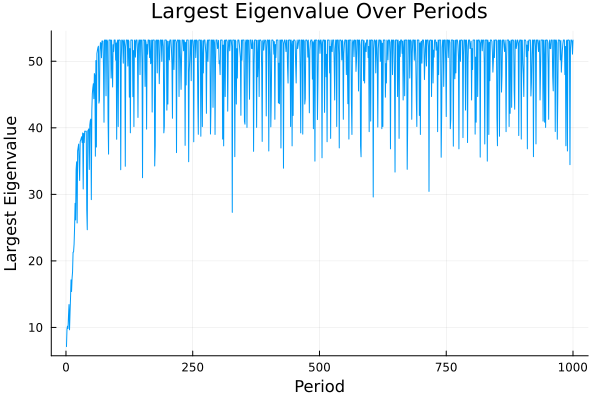

In [4]:
num_periods = length(largest_eigenvalues)
if num_periods == Nf
    periods = 1:num_periods
    plot(periods, largest_eigenvalues, xlabel="Period", ylabel="Largest Eigenvalue", title="Largest Eigenvalue Over Periods", legend=false)
else
    println("Error: The largest_eigenvalues array was not populated correctly. Expected length: $Nf, Actual length: $num_periods")
end